In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
## X_train is 3-D dataset with 60k images with 28X28 pixel size

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
## Also 3D array, 28x28 pixel

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

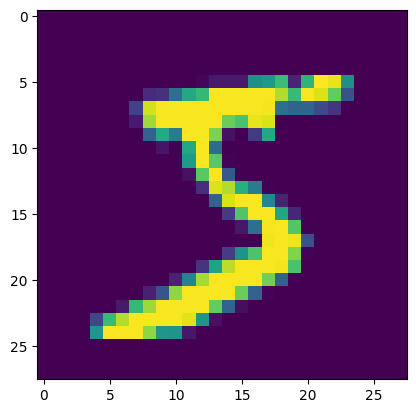

In [9]:
## Thats mean 1st image in x_train is for 5 , 2nd image is for 0
## To visualize this we can use matplotlib library function. imshow()

plt.imshow(x_train[0]) ## This is the first image which is 5


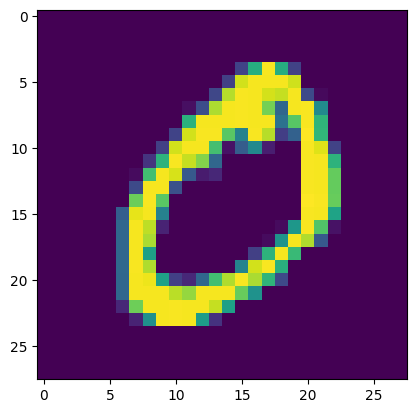

In [10]:
## 2nd Image is 0

plt.imshow(x_train[1])

In [11]:
## Now we need to create a DNN to ihis dataset so that if we give any image to the model it should predict
## which class it belongs to

In [12]:
## Feature Scaling > In DNN we need make all the values in similar range so it is mandatory step to make the # in similar range

## So we will divide all the values with 255(max_value) to make it in range of (0,1)

x_train = x_train/255
x_test = x_test/255

In [13]:
# Checing the Output
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
## Building DNN

model = Sequential()

## There is a problem with the data, all the values are in 2-D format so we need to convert them in 1-D to give as a input to the
## Model so we use Flatten() function to do that which converts multi dimnetional data in 1-D array

model.add(Flatten(input_shape=(28,28))) ## For Flattening, we need to define the size
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation ='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
## compiling the model
## Loss function we will be using is sparse_categorical_crossentropy, coz this function gives us the advantage of
## do the one hot encoding of output class by itself.
## There is one more loss function name 'categorical_crossentory' where we have do perform one hot encoding on output classes as
## they from 0,1,2,3..9.
model.compile(loss='sparse_categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'] )

In [17]:
model.fit(x_train, y_train, epochs=10, validation_split = 0.2 )

Epoch 1/10
1500/1500 [==============================] - 11s 3ms/step - loss: 0.2877 - accuracy: 0.9192 - val_loss: 0.1531 - val_accuracy: 0.9567
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1264 - accuracy: 0.9631 - val_loss: 0.1107 - val_accuracy: 0.9668
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9743 - val_loss: 0.0937 - val_accuracy: 0.9707
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0639 - accuracy: 0.9815 - val_loss: 0.0930 - val_accuracy: 0.9703
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0937 - val_accuracy: 0.9722
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0367 - accuracy: 0.9894 - val_loss: 0.0903 - val_accuracy: 0.9732
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0906 - val_accuracy

In [21]:
## Pridicition
model.predict(x_test) ## It gives probablity of all classes(0-9) for each image


313/313 [==============================] - 1s 2ms/step


array([[2.08588424e-10, 1.32560074e-10, 3.21791219e-07, ...,
        9.99997020e-01, 7.92717980e-09, 6.25012930e-08],
       [4.26082103e-13, 1.58173606e-07, 9.99999881e-01, ...,
        5.72524660e-20, 9.25330212e-09, 2.91642232e-16],
       [2.84895876e-08, 9.99752700e-01, 2.59341432e-05, ...,
        1.37364095e-05, 1.95205357e-04, 2.35752218e-08],
       ...,
       [4.35743568e-18, 1.06082894e-12, 6.05455498e-16, ...,
        3.15272752e-10, 6.15159312e-11, 4.38160413e-07],
       [3.73371202e-13, 1.29097579e-14, 2.77611724e-15, ...,
        6.46146548e-15, 2.44697573e-09, 4.98131708e-14],
       [1.51714145e-11, 2.16036187e-13, 3.09423967e-07, ...,
        1.33358575e-16, 3.81396371e-14, 6.76546179e-15]], dtype=float32)

In [22]:
## let store it in a variable

y_prob = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [24]:
## Now the goal is to find the max probability value of each image and for that we use argmax function which give the index
## for the highest value.

y_pred = y_prob.argmax(axis=1) ## Gives Index for the Highest probabily values for each images.

In [25]:
## Checing the accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9761

In [26]:
## Accuracy is is very good range of 97.61%

In [29]:
## We can try for increase the accuracy by making changes in the architecture
## Increseing One hidden layer with 32 Neurons and epochs=25

model1 = Sequential()
model1.add(Flatten(input_shape=(28,28))) ## For Flattening, we need to define the size
model1.add(Dense(128,activation='relu'))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(10, activation ='softmax'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'] )
history = model1.fit(x_train, y_train, epochs=25, validation_split = 0.2 )


Epoch 1/25
1500/1500 [==============================] - 8s 4ms/step - loss: 0.3025 - accuracy: 0.9146 - val_loss: 0.1565 - val_accuracy: 0.9530
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1253 - accuracy: 0.9619 - val_loss: 0.1124 - val_accuracy: 0.9657
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0861 - accuracy: 0.9736 - val_loss: 0.0963 - val_accuracy: 0.9700
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0644 - accuracy: 0.9796 - val_loss: 0.0842 - val_accuracy: 0.9752
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0995 - val_accuracy: 0.9714
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.0970 - val_accuracy: 0.9718
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0920 - val_accuracy:

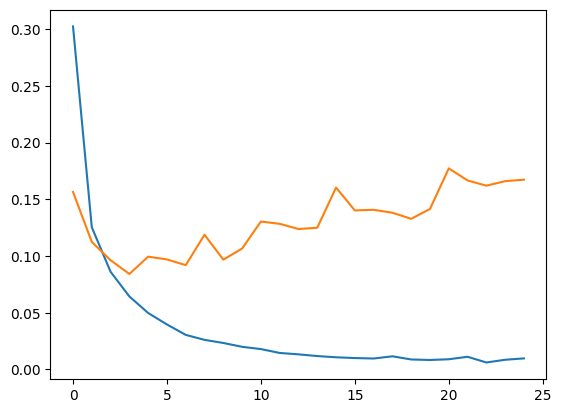

In [30]:
## PLoting

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

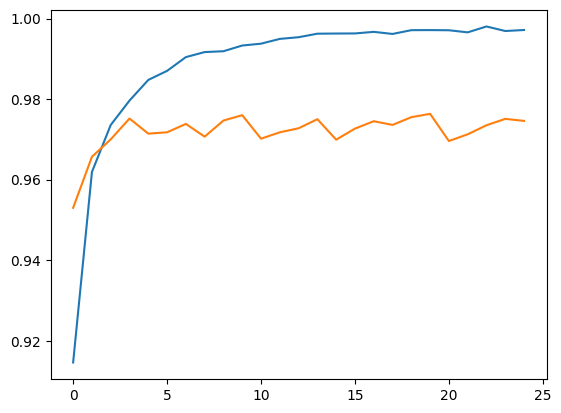

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [32]:
## Prediction

y1_pred = model1.predict(x_test).argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


In [33]:
accuracy_score(y_test,y1_pred)

0.9765

In [ ]:
## Good Accuracy. SO This is how we work on DNN MultiClass Classification